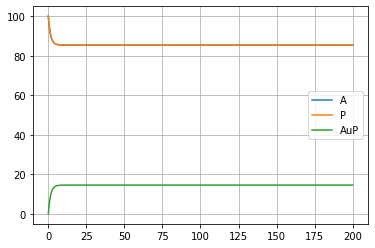

array([[1.00000000e+02, 9.99003491e+01, 9.98013932e+01, ...,
        8.54101966e+01, 8.54101966e+01, 8.54101966e+01],
       [1.00000000e+02, 9.99003491e+01, 9.98013932e+01, ...,
        8.54101966e+01, 8.54101966e+01, 8.54101966e+01],
       [0.00000000e+00, 9.96508630e-02, 1.98606788e-01, ...,
        1.45898034e+01, 1.45898034e+01, 1.45898034e+01]])

In [17]:
import numpy as np
from src.OdeModel import OdeModel
import src.reactions as re

PPI_Motif1 = OdeModel('PPI_1')
PPI_Motif1.addReaction(re.MassAction('A', 'P', Kd=0.5))
PPI_Motif1.specieConc(['A', 'P'], [100, 100])

PPI_Motif1.simulate_beta(200, plot=True)

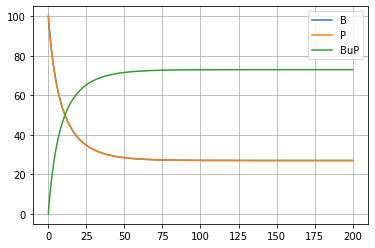

array([[1.00000000e+02, 9.99001049e+01, 9.98004191e+01, ...,
        2.70157149e+01, 2.70157148e+01, 2.70157148e+01],
       [1.00000000e+02, 9.99001049e+01, 9.98004191e+01, ...,
        2.70157149e+01, 2.70157148e+01, 2.70157148e+01],
       [0.00000000e+00, 9.98951112e-02, 1.99580867e-01, ...,
        7.29842851e+01, 7.29842852e+01, 7.29842852e+01]])

In [18]:
PPI_Motif2 = OdeModel('PPI_2')
PPI_Motif2.addReaction(re.MassAction('B', 'P'))
PPI_Motif2.specieConc(['B', 'P'], [100, 100])

PPI_Motif2.simulate_beta(200, plot=True)


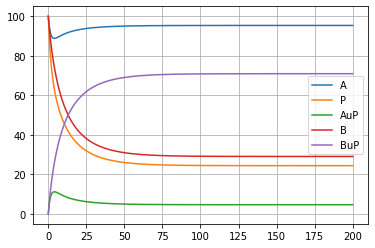

In [19]:
coupled_PPI = PPI_Motif1.combine(PPI_Motif2, 'Coupled_PPI')
coupled_PPI.simulate_beta(200)
coupled_PPI.plot()
